# Final Project Real Version

## Todo
* Scale fire by population density
* Scale arrests by population
* Make outlandish assertions

Import all necessary libraries for data manipulation/representation:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Read in our shapefile map of Pittsburgh and display to confirm accuracy

<AxesSubplot:>

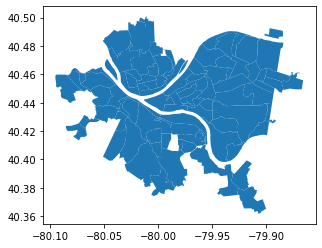

In [2]:
#read in shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#plot map to confirm accuracy
neighborhoods.plot()

Woah cool now we have a map of Pittsburgh!  

Not really that helpful right now, so lets get some more data about it

Lets start by reading in our data for fires, arrests, and populations for each neighborhood

In [3]:
#Read in csv file for fire, arrest, pop. density, and population data sets, in that order
fires_messy = pd.read_csv("FireData.csv")
arrests_messy = pd.read_csv("ArrestData.csv")
density_messy = pd.read_csv("Density.csv")
pop_messy = pd.read_csv("Population.csv")

We now have the data files, so lets see what we are looking at  
(This data was taken from [WPRDC](https://data.wprdc.org/dataset) and edited prior to importing into this notebook)

Here is a peek at our fire data:

In [4]:
fires = fires_messy.iloc[:, 1:]
fires.head()

,Neighborhood,Number of Fires
0,Regent Square,5
1,East Carnegie,8
2,Mt. Oliver,10
3,Ridgemont,10
4,St. Clair,11


And our arrest data:

In [5]:
arrests = arrests_messy.iloc[:, 1:]
arrests.head()

,Neighborhood,Number of Arrests
0,Central Business District,2877
1,South Side Flats,2414
2,Carrick,1693
3,East Allegheny,1578
4,Homewood South,1549


Population density:

In [6]:
density = density_messy.iloc[:, 1:]
density.head()

,Neighborhood,Persons / sq. mi (2010)
0,Central Oakland,21658.4
1,North Oakland,21144.3
2,Bluff,20183.5
3,Friendship,16839.6
4,Shadyside,15108.6


And last but not least our population data:

In [7]:
pop = pop_messy.iloc[:, 1:]
pop.head()

,Neighborhood,Pop. 2010
0,Squirrel Hill South,15110
1,Shadyside,13915
2,Brookline,13214
3,Squirrel Hill North,11363
4,North Oakland,10551


So now have our data all read in and looking clean, and we have our shape file  
Now lets combine them!

We will have to start with a final touch up of our shape map data to make merging a little bit easier with all of our different data sets

In [8]:
# make sure everything's in order
neighborhoods = neighborhoods.dropna()
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
84,Chartiers City,3683600.5,9983.549,"POLYGON ((-80.06952 40.46044, -80.06944 40.460..."
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."


Now we are ready to merge our data  
Lets start with our population data

In [12]:
# merge population data and shape data
pop_map = neighborhoods.merge(pop, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
pop_map[['hood', 'Pop. 2010', 'Neighborhood', 'geometry']].head()

,hood,Pop. 2010,Neighborhood,geometry
0,Central Oakland,6086,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,10551,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2604,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2256,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,616,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


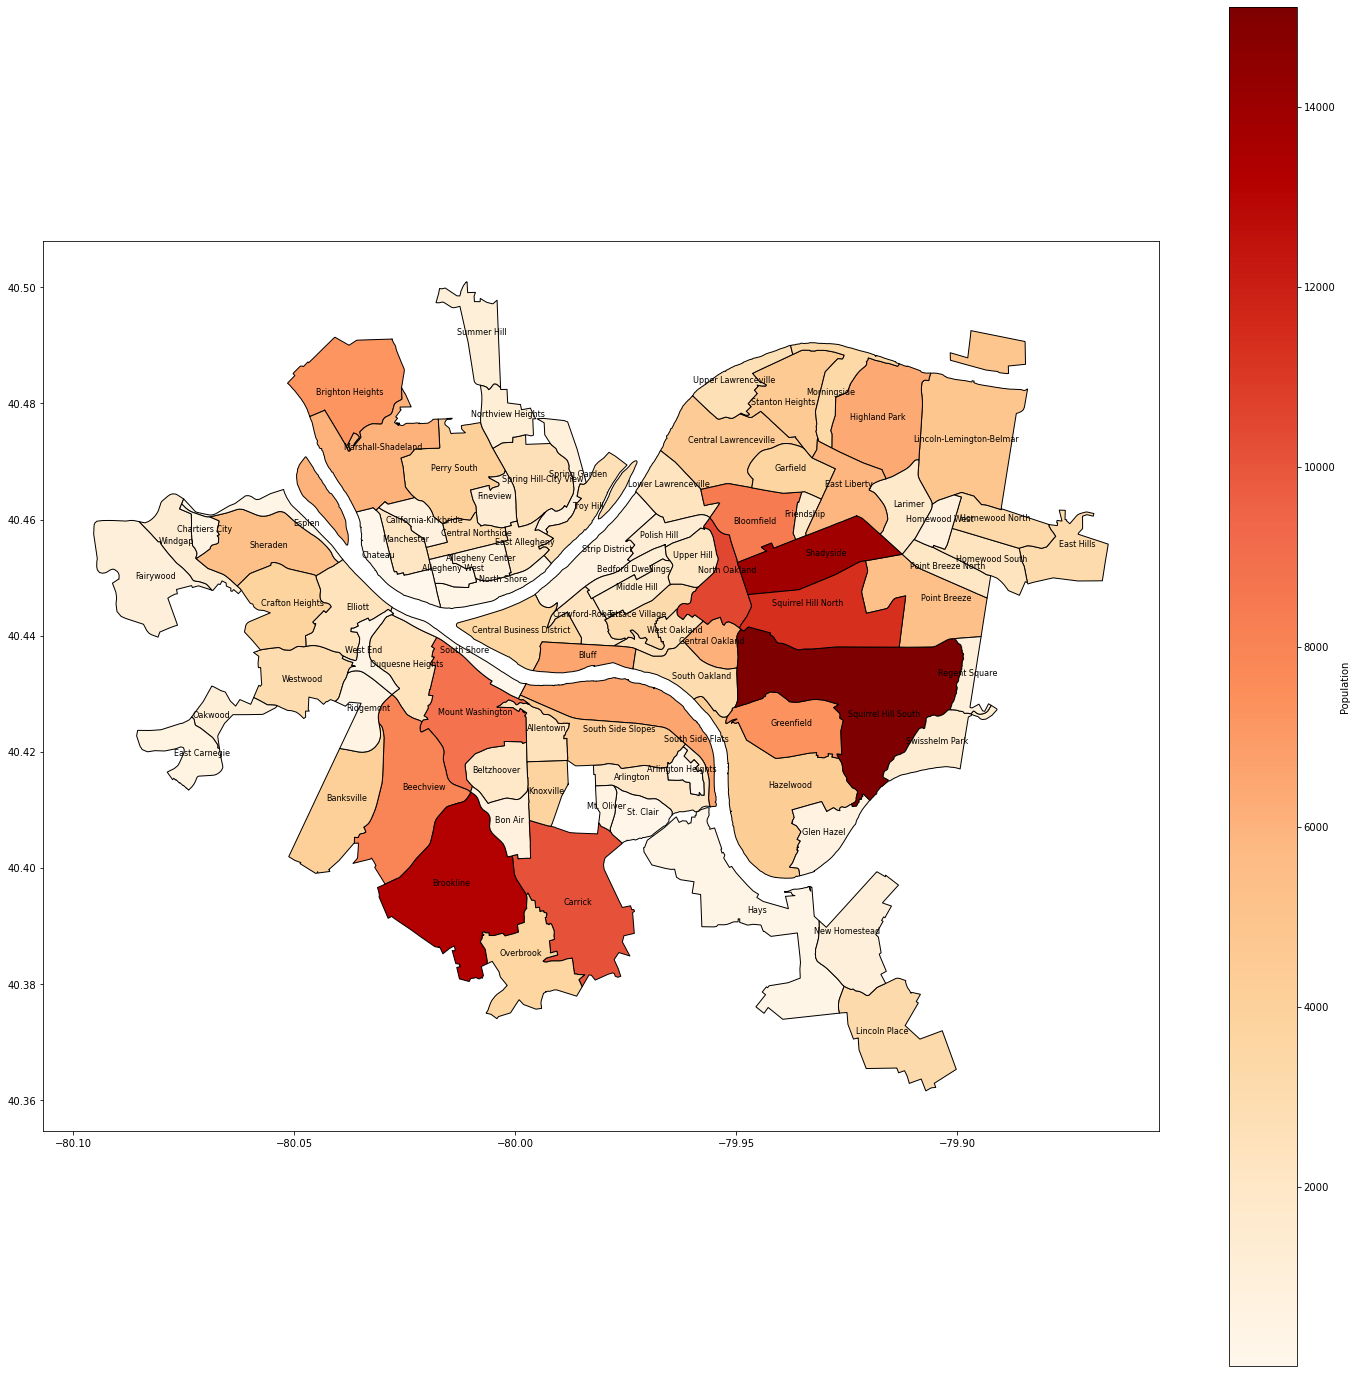

In [13]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
pop_map['coords'] = pop_map['geometry'].apply(lambda x: x.representative_point().coords[:])
pop_map['coords'] = [coords[0] for coords in pop_map['coords']]

# Map setup
pop_map.plot(column='Pop. 2010', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in pop_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

Here we see the most populated neighborhoods in Pittsburgh.  
Lets see the most dense areas

In [15]:
# merge population data and shape data
density_map = neighborhoods.merge(density, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
density_map[['hood', 'Persons / sq. mi (2010)', 'Neighborhood', 'geometry']].head()

,hood,Persons / sq. mi (2010),Neighborhood,geometry
0,Central Oakland,21658.4,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,21144.3,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,12111.6,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,8744.2,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1013.2,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


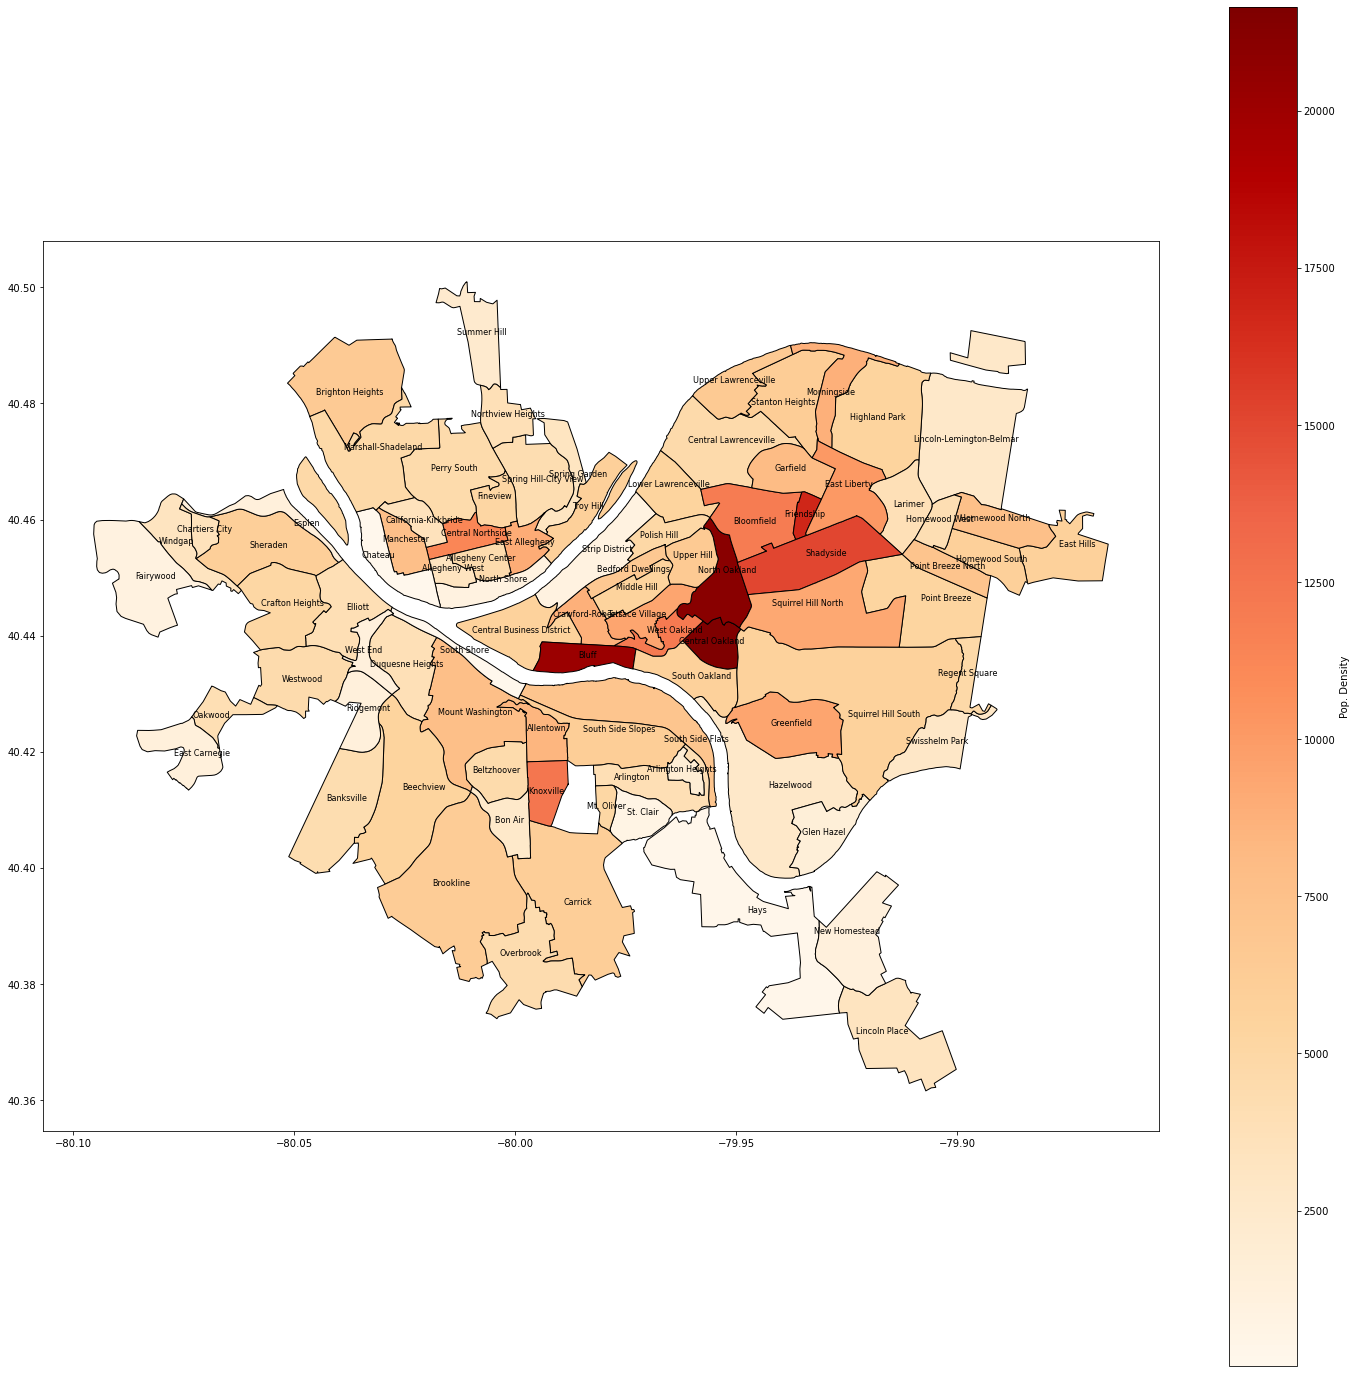

In [18]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
density_map['coords'] = density_map['geometry'].apply(lambda x: x.representative_point().coords[:])
density_map['coords'] = [coords[0] for coords in density_map['coords']]

# Map setup
density_map.plot(column='Persons / sq. mi (2010)', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Pop. Density"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in density_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

In [17]:
# merge population data and shape data
fire_map = neighborhoods.merge(fires, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
fire_map[['hood', 'Number of Fires', 'Neighborhood', 'geometry']].head()

,hood,Number of Fires,Neighborhood,geometry
0,Central Oakland,80,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,100,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,52,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,85,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,41,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


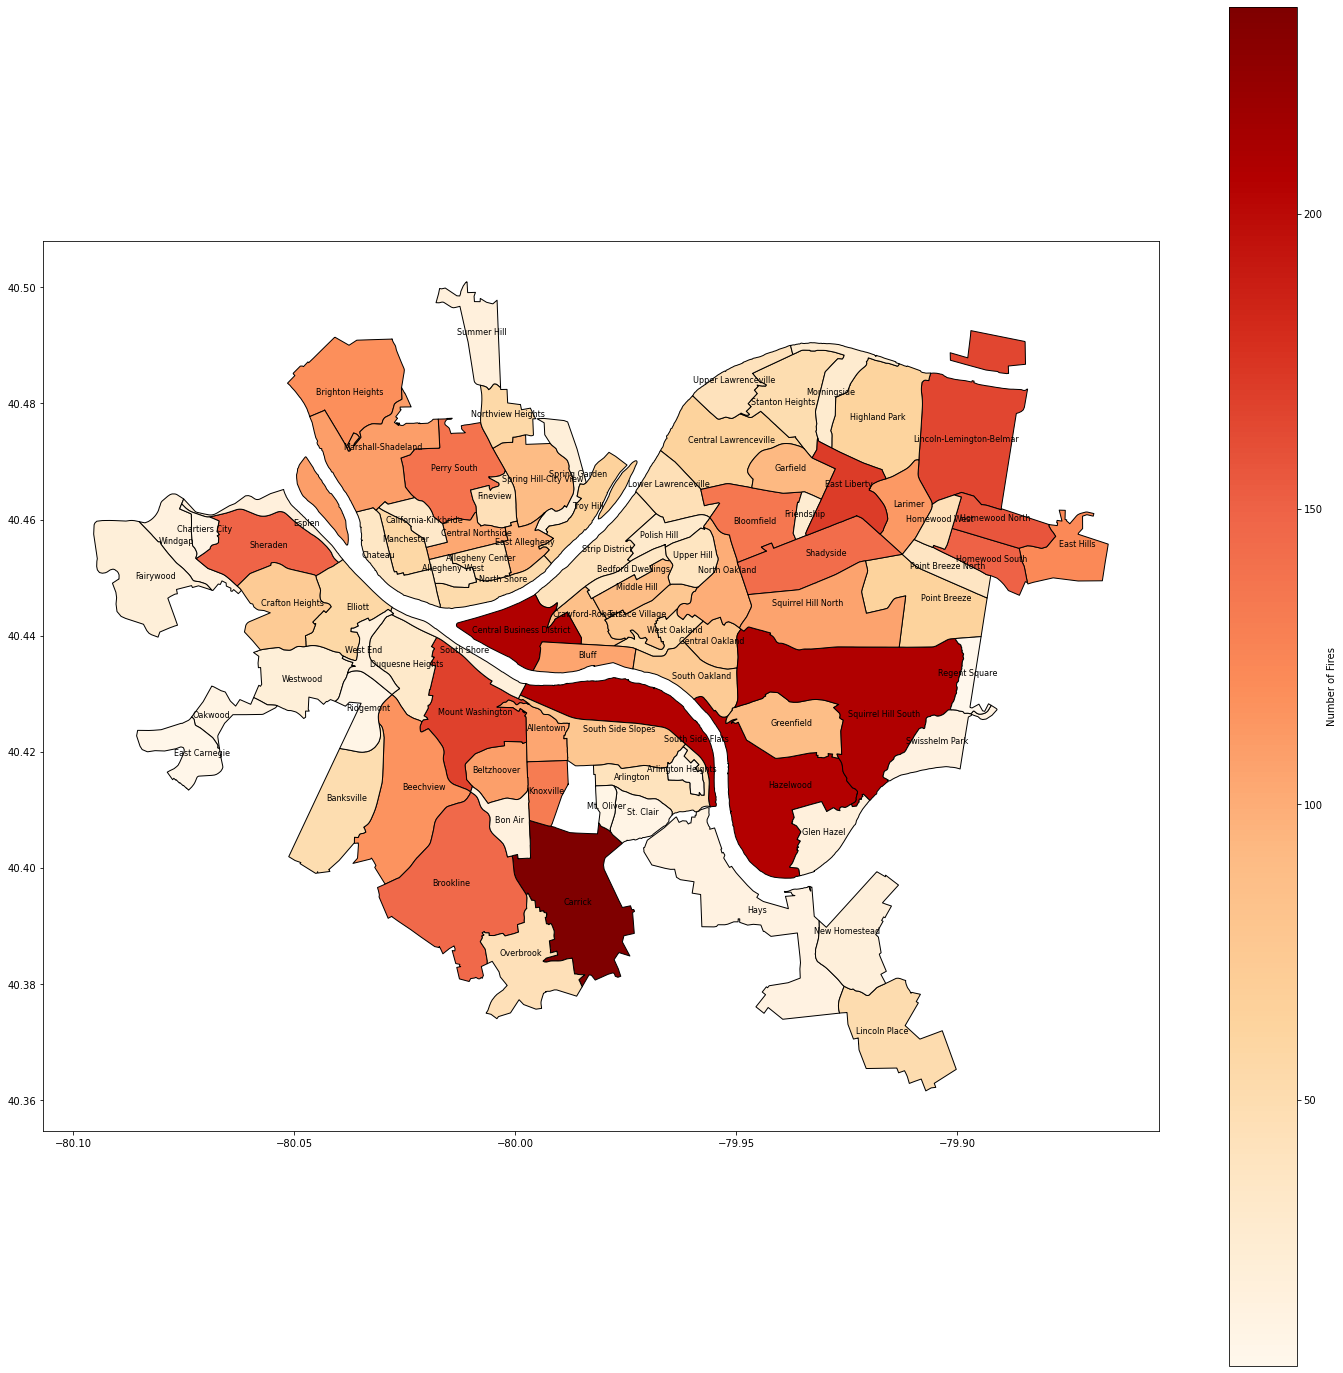

In [19]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
fire_map['coords'] = fire_map['geometry'].apply(lambda x: x.representative_point().coords[:])
fire_map['coords'] = [coords[0] for coords in fire_map['coords']]

# Map setup
fire_map.plot(column='Number of Fires', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Fires"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in fire_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

In [20]:
# merge population data and shape data
arrest_map = neighborhoods.merge(arrests, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
arrest_map[['hood', 'Number of Arrests', 'Neighborhood', 'geometry']].head()

,hood,Number of Arrests,Neighborhood,geometry
0,Central Oakland,389.0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,311.0,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,225.0,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,605.0,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,352.0,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


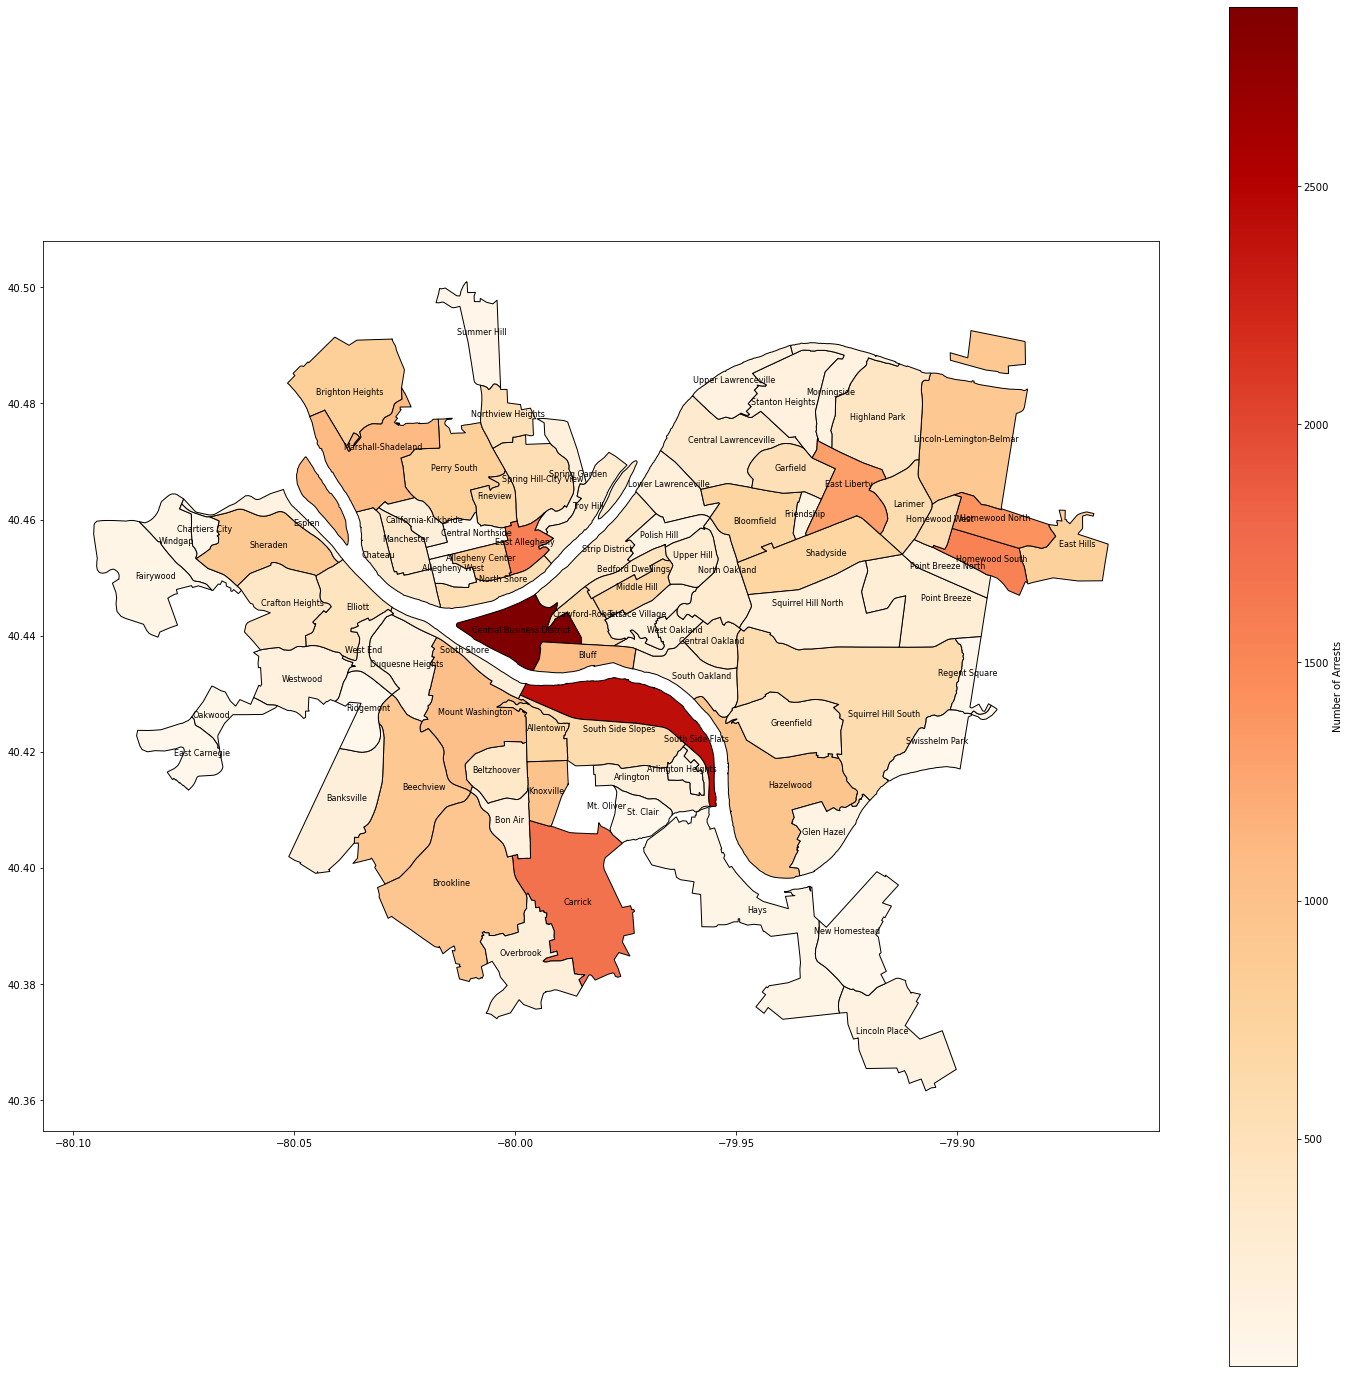

In [21]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
arrest_map['coords'] = arrest_map['geometry'].apply(lambda x: x.representative_point().coords[:])
arrest_map['coords'] = [coords[0] for coords in arrest_map['coords']]

# Map setup
arrest_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in arrest_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')